740.3890556045895


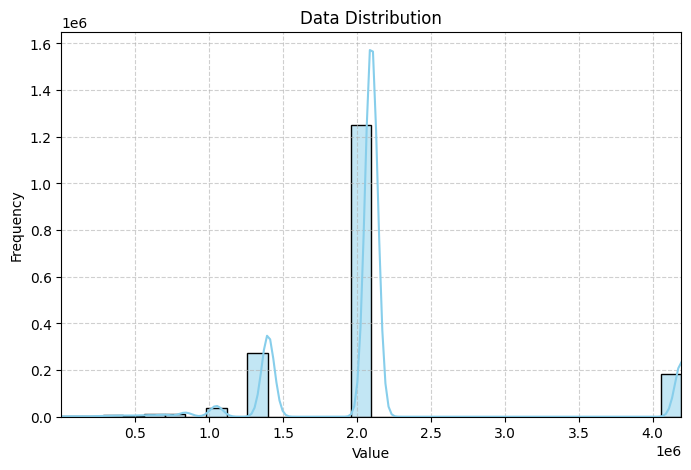

MD-5: 1779514.58 hash/s


In [19]:
import hashlib
import time
from typing import Callable
import bcrypt
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pwd = b"1et-m3-c00k"

def plot_distribution(data, bins=30, kde=True, title="Data Distribution"):
    """
    Plot the distribution of a list of floats.

    Parameters:
        data (list[float]): List of float values.
        bins (int): Number of bins for the histogram.
        kde (bool): Whether to overlay Kernel Density Estimate (KDE).
        title (str): Title of the plot.
    """
    plt.figure(figsize=(8, 5))
    sns.histplot(data, bins=bins, kde=kde, color="skyblue", edgecolor="black")
    plt.title(title)
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    q25, q75 = np.percentile(data, [0, 100])
    plt.xlim(q25, q75)

    plt.grid(True, linestyle="--", alpha=0.6)
    plt.show()


def get_pwd_dict() -> list[str]:
    with open("pwd_dict.txt", "r") as f:
        return [x.strip("\n") for x in f.readlines()]

def metric(fn: Callable[[], str]) -> float:
    count = 0
    store = []
    start = time.time()
    last = start
    
    while True:
        now = time.time()
        duration = now - start
        if duration >= 1:
           break

        count +=1
        store.append(1/(now - last))
        last = now
        x = fn()
    # for i in range(10_000_000):
    #     fn()
    # start = time.time()
    # fn()
    # sec_per_hash = time.time() - start
    # return 1 / sec_per_hash
    print(min(store))

    plot_distribution(store)
    return round(count / duration, 2)   
def log(algo: str, count: float):
    print(f"{algo}: {count} hash/s")    

log("MD-5", metric(lambda : hashlib.md5(pwd).hexdigest()))
# log("SHA-1", utils.metric(lambda : hashlib.sha1(pwd).hexdigest()))
# log("bcrypt", utils.metric(lambda : bcrypt.hashpw(pwd, bcrypt.gensalt())))

